# GPU 확인

!nvidia-smi

# 의존성 설치

%pip install torch==2.6.0+cu124 torchvision==0.21.0+cu124 torchaudio==2.6.0+cu124 --index-url https://download.pytorch.org/whl/cu124
%pip install ultralytics
%pip install roboflow

In [ ]:
%matplotlib inline

import os
import torch
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from roboflow import Roboflow
from ultralytics import YOLO
from pathlib import Path
from PIL import Image

# GPU 할당

In [ ]:
import os
import torch

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

print(torch.cuda.device_count())            # → 1
print(torch.cuda.get_device_name(0))    

# 데이터 셋 다운로드

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="MF8Wd7JxbRUZSmQTC9fw")
project = rf.workspace("eye-annotations-yolo-to-voc").project("eye-detection-kso3d")
version = project.version(4)
dataset = version.download("yolov11")

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 44.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 68.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.0:
      Successfully uninstalled pillow-11.0.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Eye-Detection-4 in yolov11:: 100%|██████████| 2590/2590 [00:00<00:00, 9923.18it/s]


# 라이브러리 임포트 & 경로 설정

In [ ]:
%matplotlib inline

import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pathlib import Path
from ultralytics import YOLO
from PIL import Image

In [7]:
# 데이터셋 루트 디렉터리 (본인 환경에 맞게 수정)
dataset_root = Path('Eye-Detection-4')
yaml_path    = dataset_root / 'data.yaml'

print(f"Dataset root: {dataset_root}")
print(f"YAML path: {yaml_path}")

Dataset root: Eye-Detection-4
YAML path: Eye-Detection-4/data.yaml


# 모델 로드 및 데이터 학습

In [8]:
# 1) 원하는 사전학습 모델 선택 (nano, small, etc.)
model = YOLO('yolo11n.pt')

# 2) 트레이닝
results = model.train(
    data=str(yaml_path),     # data.yaml 경로
    epochs=100,              # 학습 에포크
    imgsz=416,               # 입력 이미지 크기
    batch=16,                # 배치 크기
    workers=4,               # 데이터 로더 워커
    device=0,                # GPU 번호 (CPU: 'cpu')
    name='eye_kso3d_v4',     # 저장될 결과 폴더명
    project='runs/train',    
    exist_ok=True            # 동일 이름 시 덮어쓰기
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.8MB/s]

Ultralytics 8.3.168 🚀 Python-3.12.6 torch-2.6.0+cu124 CUDA:0 (Tesla V100S-PCIE-32GB, 32494MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Eye-Detection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=eye_kso3d_v4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  8                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  9                  -1  1    164608  ultralytics.nn.modules.block.SPPF            [256, 256, 5]                 
 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /home/j-i13b101/Eye-Detection-4/train/labels... 1113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1113/1113 [00:00<00:00, 2074.81it/s]

train: New cache created: /home/j-i13b101/Eye-Detection-4/train/labels.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 510.9±116.6 MB/s, size: 36.6 KB)


val: Scanning /home/j-i13b101/Eye-Detection-4/valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 2056.38it/s]

val: New cache created: /home/j-i13b101/Eye-Detection-4/valid/labels.cache


Plotting labels to runs/train/eye_kso3d_v4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/train/eye_kso3d_v4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.07G      4.292      6.488      1.425         70        416: 100%|██████████| 70/70 [00:07<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  7.76it/s]

                   all        110        872   0.000436     0.0148   0.000938   0.000224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       1.3G      3.509      3.161      1.051        114        416: 100%|██████████| 70/70 [00:05<00:00, 11.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.02it/s]

                   all        110        872      0.168     0.0598     0.0739     0.0192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.32G      3.311      2.692      1.023         74        416: 100%|██████████| 70/70 [00:05<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.85it/s]

                   all        110        872      0.158      0.261       0.11     0.0305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.33G      3.123      2.418     0.9887         74        416: 100%|██████████| 70/70 [00:05<00:00, 13.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.30it/s]

                   all        110        872       0.26        0.3      0.169     0.0517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.35G      3.053      2.217     0.9792        111        416: 100%|██████████| 70/70 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.96it/s]

                   all        110        872      0.258      0.329      0.199     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.36G       3.04      2.108     0.9763        103        416: 100%|██████████| 70/70 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]

                   all        110        872      0.258      0.347       0.22     0.0698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.38G      2.917      1.963     0.9594         77        416: 100%|██████████| 70/70 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.13it/s]

                   all        110        872      0.262      0.386      0.197     0.0675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.39G      2.885      1.913     0.9585         96        416: 100%|██████████| 70/70 [00:06<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]

                   all        110        872      0.242      0.368      0.214     0.0688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       1.4G      2.799      1.849      0.948         68        416: 100%|██████████| 70/70 [00:06<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.13it/s]

                   all        110        872      0.278      0.382      0.194     0.0642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.42G      2.872      1.844     0.9519         63        416: 100%|██████████| 70/70 [00:06<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]

                   all        110        872       0.29      0.399      0.231     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.44G      2.853      1.825     0.9439         76        416: 100%|██████████| 70/70 [00:06<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.23it/s]

                   all        110        872      0.307      0.372      0.252     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.45G      2.783      1.774     0.9445         52        416: 100%|██████████| 70/70 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]

                   all        110        872      0.308      0.384      0.227     0.0789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.47G      2.771      1.739     0.9405         61        416: 100%|██████████| 70/70 [00:06<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.39it/s]

                   all        110        872      0.297       0.42      0.236     0.0792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.48G      2.751      1.713     0.9323         74        416: 100%|██████████| 70/70 [00:06<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]

                   all        110        872      0.278      0.422      0.206     0.0725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.49G      2.687      1.683     0.9325         52        416: 100%|██████████| 70/70 [00:06<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.25it/s]

                   all        110        872      0.299      0.442       0.25     0.0881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.51G      2.656       1.67     0.9221         94        416: 100%|██████████| 70/70 [00:06<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]

                   all        110        872      0.299      0.406       0.24     0.0799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.52G      2.702      1.653     0.9029         78        416: 100%|██████████| 70/70 [00:06<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.30it/s]

                   all        110        872      0.307      0.417      0.254      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.54G      2.575      1.611     0.9174         77        416: 100%|██████████| 70/70 [00:06<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.87it/s]

                   all        110        872      0.333      0.447       0.27     0.0989



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.55G      2.584      1.603     0.9203         93        416: 100%|██████████| 70/70 [00:06<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.12it/s]

                   all        110        872      0.304      0.403      0.241     0.0866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.57G      2.685      1.648     0.9172         70        416: 100%|██████████| 70/70 [00:06<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.21it/s]

                   all        110        872      0.319      0.434      0.249     0.0851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.58G      2.596      1.577     0.9172         56        416: 100%|██████████| 70/70 [00:06<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.10it/s]

                   all        110        872      0.309      0.445      0.257     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       1.6G       2.57       1.58     0.9093         93        416: 100%|██████████| 70/70 [00:06<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.78it/s]

                   all        110        872      0.314      0.475      0.261     0.0957



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.61G      2.555      1.575     0.9119         48        416: 100%|██████████| 70/70 [00:06<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.30it/s]

                   all        110        872      0.301      0.454      0.266     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.62G      2.564      1.597     0.9183         61        416: 100%|██████████| 70/70 [00:06<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]

                   all        110        872      0.309      0.486      0.288      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.64G      2.562      1.582     0.9113         55        416: 100%|██████████| 70/70 [00:06<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.27it/s]

                   all        110        872      0.293      0.476      0.247       0.09



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.65G      2.522      1.555     0.8993         74        416: 100%|██████████| 70/70 [00:06<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]

                   all        110        872      0.312      0.477      0.255     0.0888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.67G      2.511      1.531     0.9103        100        416: 100%|██████████| 70/70 [00:06<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.15it/s]

                   all        110        872      0.346      0.468      0.287        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.69G      2.449      1.507     0.9022         70        416: 100%|██████████| 70/70 [00:06<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.12it/s]

                   all        110        872      0.311      0.463      0.274      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.7G      2.492       1.53     0.9002         84        416: 100%|██████████| 70/70 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]

                   all        110        872       0.32      0.478      0.267      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.71G      2.453      1.515      0.891         89        416: 100%|██████████| 70/70 [00:06<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.04it/s]

                   all        110        872      0.346      0.464      0.265      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.73G      2.441       1.51     0.8907         68        416: 100%|██████████| 70/70 [00:06<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.12it/s]

                   all        110        872      0.345      0.489      0.274      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.74G       2.46       1.51     0.9001         69        416: 100%|██████████| 70/70 [00:06<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.05it/s]

                   all        110        872      0.324       0.48      0.289      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.76G      2.473      1.511     0.8984         57        416: 100%|██████████| 70/70 [00:06<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]

                   all        110        872      0.334      0.447      0.303       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.77G      2.423      1.477      0.898         70        416: 100%|██████████| 70/70 [00:06<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.91it/s]

                   all        110        872      0.306      0.476      0.279      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.79G      2.383      1.478     0.8978         83        416: 100%|██████████| 70/70 [00:06<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.82it/s]

                   all        110        872      0.352      0.469       0.29      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       1.8G      2.426      1.486     0.9026         99        416: 100%|██████████| 70/70 [00:06<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]

                   all        110        872      0.371      0.465      0.299      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.82G      2.393      1.479     0.8988         64        416: 100%|██████████| 70/70 [00:06<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.11it/s]

                   all        110        872      0.354      0.485      0.313      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.83G      2.404      1.485     0.8978         74        416: 100%|██████████| 70/70 [00:06<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.94it/s]

                   all        110        872      0.354      0.457      0.327      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.85G      2.345      1.453     0.8895         84        416: 100%|██████████| 70/70 [00:06<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]

                   all        110        872      0.325      0.474      0.279      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.86G      2.392      1.463     0.8914         74        416: 100%|██████████| 70/70 [00:06<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]

                   all        110        872      0.355      0.502      0.293      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.88G      2.328      1.439     0.8896         56        416: 100%|██████████| 70/70 [00:06<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.20it/s]

                   all        110        872      0.347      0.476       0.28       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       1.9G      2.334      1.428     0.8816         53        416: 100%|██████████| 70/70 [00:06<00:00, 10.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.91it/s]

                   all        110        872      0.354      0.491      0.283      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.91G      2.341       1.44      0.876         88        416: 100%|██████████| 70/70 [00:06<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]

                   all        110        872      0.356      0.514      0.309      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.92G      2.359      1.457     0.8906         83        416: 100%|██████████| 70/70 [00:06<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]

                   all        110        872      0.358      0.516      0.339      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.94G      2.285      1.431     0.8799         74        416: 100%|██████████| 70/70 [00:06<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.44it/s]

                   all        110        872      0.366      0.515       0.35      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.95G      2.276      1.412     0.8765        100        416: 100%|██████████| 70/70 [00:06<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]

                   all        110        872      0.357        0.5      0.298      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.97G      2.284      1.416     0.8921         72        416: 100%|██████████| 70/70 [00:06<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.60it/s]

                   all        110        872      0.346      0.492      0.308      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.98G      2.302       1.41     0.8852         91        416: 100%|██████████| 70/70 [00:06<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.08it/s]

                   all        110        872      0.364      0.489      0.338      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         2G      2.249      1.387     0.8803         77        416: 100%|██████████| 70/70 [00:06<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.25it/s]

                   all        110        872      0.367      0.508      0.315      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.01G      2.275      1.401     0.8739         70        416: 100%|██████████| 70/70 [00:07<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.64it/s]

                   all        110        872      0.348      0.485      0.314      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.03G      2.269      1.431     0.8829        106        416: 100%|██████████| 70/70 [00:06<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]

                   all        110        872      0.358      0.506      0.292       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.04G      2.219      1.395      0.871         79        416: 100%|██████████| 70/70 [00:06<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.99it/s]

                   all        110        872      0.362      0.506      0.299      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.05G      2.214      1.389     0.8684         83        416: 100%|██████████| 70/70 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.24it/s]

                   all        110        872      0.361      0.505      0.305      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.07G      2.205      1.395     0.8748         64        416: 100%|██████████| 70/70 [00:06<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]

                   all        110        872      0.358      0.515      0.297      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.08G      2.237      1.387     0.8784         68        416: 100%|██████████| 70/70 [00:06<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.88it/s]

                   all        110        872      0.362      0.529      0.329      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       2.1G      2.196      1.392     0.8796         56        416: 100%|██████████| 70/70 [00:07<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.57it/s]

                   all        110        872      0.358      0.529      0.315      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.12G      2.215      1.363     0.8711         55        416: 100%|██████████| 70/70 [00:07<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.48it/s]

                   all        110        872      0.374      0.514      0.322      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.13G      2.184      1.377     0.8711         73        416: 100%|██████████| 70/70 [00:07<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.39it/s]

                   all        110        872       0.36      0.515      0.306      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.14G      2.136      1.347     0.8693         79        416: 100%|██████████| 70/70 [00:07<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.49it/s]

                   all        110        872      0.367      0.518      0.304      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.16G       2.15      1.359     0.8681         87        416: 100%|██████████| 70/70 [00:07<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.32it/s]

                   all        110        872       0.38      0.525      0.359      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.17G      2.148      1.351     0.8667         68        416: 100%|██████████| 70/70 [00:07<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.94it/s]

                   all        110        872      0.379      0.501      0.329      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.19G      2.188       1.38     0.8644         33        416: 100%|██████████| 70/70 [00:07<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.60it/s]

                   all        110        872      0.359      0.523      0.307      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       2.2G      2.192      1.377     0.8777         93        416: 100%|██████████| 70/70 [00:07<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.81it/s]

                   all        110        872      0.357        0.5      0.294      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.22G       2.18      1.367     0.8622         71        416: 100%|██████████| 70/70 [00:07<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.56it/s]

                   all        110        872      0.376      0.502      0.304      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.23G      2.121      1.344     0.8674         74        416: 100%|██████████| 70/70 [00:07<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.56it/s]

                   all        110        872      0.369      0.523      0.294      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.25G      2.122       1.34     0.8647         76        416: 100%|██████████| 70/70 [00:07<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.35it/s]

                   all        110        872      0.365      0.527      0.307      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.26G      2.112      1.336     0.8655         60        416: 100%|██████████| 70/70 [00:07<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.73it/s]

                   all        110        872      0.383      0.496      0.321       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G      2.141      1.352     0.8619         80        416: 100%|██████████| 70/70 [00:07<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.80it/s]

                   all        110        872      0.395      0.505      0.339      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.29G      2.076      1.342     0.8654         52        416: 100%|██████████| 70/70 [00:07<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.42it/s]

                   all        110        872      0.384       0.51      0.332      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       2.3G      2.052       1.32     0.8559         89        416: 100%|██████████| 70/70 [00:07<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.50it/s]

                   all        110        872      0.385      0.537      0.327      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.32G      2.066       1.31     0.8576         89        416: 100%|██████████| 70/70 [00:07<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.62it/s]

                   all        110        872      0.365      0.525      0.294      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.34G      2.039      1.317     0.8596         33        416: 100%|██████████| 70/70 [00:07<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.68it/s]

                   all        110        872      0.368      0.522      0.303      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.35G      2.039      1.317     0.8565         53        416: 100%|██████████| 70/70 [00:07<00:00,  9.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.68it/s]

                   all        110        872      0.377      0.517       0.29      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.36G      2.013      1.299     0.8555         74        416: 100%|██████████| 70/70 [00:07<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.47it/s]

                   all        110        872      0.375      0.537      0.296      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.38G      2.085      1.319     0.8593         62        416: 100%|██████████| 70/70 [00:07<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.77it/s]

                   all        110        872      0.373      0.517      0.331      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.39G      2.058      1.314     0.8538         87        416: 100%|██████████| 70/70 [00:07<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.67it/s]

                   all        110        872      0.358      0.534       0.32      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.41G      2.029      1.294     0.8537         88        416: 100%|██████████| 70/70 [00:07<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.85it/s]

                   all        110        872      0.374       0.53       0.32      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.42G      2.005      1.273     0.8581         68        416: 100%|██████████| 70/70 [00:07<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.82it/s]

                   all        110        872      0.383      0.545      0.335      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.44G      2.046      1.304     0.8538         43        416: 100%|██████████| 70/70 [00:07<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.95it/s]

                   all        110        872      0.376      0.535      0.326      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.45G      2.011      1.289     0.8584         97        416: 100%|██████████| 70/70 [00:07<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 10.08it/s]

                   all        110        872      0.389      0.549      0.336      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.47G      2.018      1.298     0.8494         66        416: 100%|██████████| 70/70 [00:06<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]

                   all        110        872      0.393      0.526      0.333      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.48G      1.961      1.278     0.8539         56        416: 100%|██████████| 70/70 [00:06<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]

                   all        110        872      0.388      0.521      0.349      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       2.5G      1.993       1.29     0.8502         65        416: 100%|██████████| 70/70 [00:07<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.87it/s]

                   all        110        872       0.38      0.535      0.329      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.51G       1.98      1.273     0.8544         56        416: 100%|██████████| 70/70 [00:07<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.56it/s]

                   all        110        872       0.38      0.531      0.344      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.53G      1.965      1.267     0.8547        104        416: 100%|██████████| 70/70 [00:06<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.03it/s]

                   all        110        872      0.375      0.536      0.321      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.54G      2.022      1.299     0.8554         76        416: 100%|██████████| 70/70 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]

                   all        110        872      0.378      0.536      0.305      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.56G      1.963      1.272     0.8483         90        416: 100%|██████████| 70/70 [00:06<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]

                   all        110        872      0.376      0.544      0.308      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.57G      1.963      1.274     0.8453         82        416: 100%|██████████| 70/70 [00:06<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.48it/s]

                   all        110        872       0.38       0.53      0.321      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.59G       1.92      1.247     0.8408         50        416: 100%|██████████| 70/70 [00:06<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]

                   all        110        872      0.376       0.53      0.323      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       2.6G       1.98      1.259     0.8448         62        416: 100%|██████████| 70/70 [00:06<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.86it/s]

                   all        110        872      0.371      0.533      0.312      0.132


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.62G      1.863      1.227     0.8627         70        416: 100%|██████████| 70/70 [00:06<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.20it/s]

                   all        110        872      0.379      0.525      0.312      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.63G       1.83      1.217     0.8571         66        416: 100%|██████████| 70/70 [00:05<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]

                   all        110        872      0.379      0.537      0.319      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.65G      1.839      1.222     0.8587         62        416: 100%|██████████| 70/70 [00:05<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.40it/s]

                   all        110        872      0.377      0.541      0.327       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.66G      1.816      1.202     0.8518         68        416: 100%|██████████| 70/70 [00:05<00:00, 11.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.10it/s]

                   all        110        872      0.381      0.535      0.331      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.68G      1.781      1.194     0.8593         64        416: 100%|██████████| 70/70 [00:06<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.66it/s]

                   all        110        872      0.383      0.552      0.335      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.69G        1.8      1.194     0.8541         58        416: 100%|██████████| 70/70 [00:06<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.96it/s]

                   all        110        872      0.378      0.538      0.328      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.71G      1.769      1.196     0.8493         56        416: 100%|██████████| 70/70 [00:06<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.96it/s]

                   all        110        872      0.387      0.552      0.338      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.72G      1.764      1.184     0.8527         68        416: 100%|██████████| 70/70 [00:06<00:00, 10.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.86it/s]

                   all        110        872      0.382      0.538      0.337      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.74G      1.758       1.19     0.8552         64        416: 100%|██████████| 70/70 [00:06<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.97it/s]

                   all        110        872      0.385      0.557      0.337      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.75G      1.752      1.183     0.8557         56        416: 100%|██████████| 70/70 [00:06<00:00, 10.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  9.78it/s]

                   all        110        872      0.386      0.561      0.342      0.147



100 epochs completed in 0.207 hours.
Optimizer stripped from runs/train/eye_kso3d_v4/weights/last.pt, 5.4MB
Optimizer stripped from runs/train/eye_kso3d_v4/weights/best.pt, 5.4MB

Validating runs/train/eye_kso3d_v4/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.12.6 torch-2.6.0+cu124 CUDA:0 (Tesla V100S-PCIE-32GB, 32494MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  4.00it/s]


                   all        110        872      0.378      0.523      0.355      0.145
                     0        109        216       0.33      0.296      0.218     0.0737
                     1        109        216      0.325      0.333      0.214     0.0832
                     2        110        220      0.429      0.718      0.504      0.212
                     3        110        220      0.429      0.745      0.485      0.213
Speed: 0.1ms preprocess, 4.8ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/train/eye_kso3d_v4


# 검증 및 테스트

In [9]:
# Valid set 평가
val_metrics = model.val(data=str(yaml_path))
print(val_metrics)

# Test set 평가
test_metrics = model.val(data=str(yaml_path), split='test')
print(test_metrics)

Ultralytics 8.3.168 🚀 Python-3.12.6 torch-2.6.0+cu124 CUDA:0 (Tesla V100S-PCIE-32GB, 32494MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1510.6±253.0 MB/s, size: 36.4 KB)


val: Scanning /home/j-i13b101/Eye-Detection-4/valid/labels.cache... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.02it/s]


                   all        110        872      0.381      0.527      0.354      0.144
                     0        109        216      0.339      0.306      0.224      0.074
                     1        109        216      0.328      0.342      0.212     0.0814
                     2        110        220      0.429      0.718      0.502      0.214
                     3        110        220      0.428      0.741      0.477      0.207
Speed: 0.6ms preprocess, 4.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/train/eye_kso3d_v4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fee4902bb00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.0050

val: Scanning /home/j-i13b101/Eye-Detection-4/test/labels... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<00:00, 2158.96it/s]

val: New cache created: /home/j-i13b101/Eye-Detection-4/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.49it/s]


                   all         66        524      0.387      0.543      0.355      0.142
                     0         66        130      0.368      0.354      0.242     0.0817
                     1         66        130      0.335      0.331      0.199     0.0683
                     2         66        132      0.443      0.758      0.495      0.198
                     3         66        132      0.401      0.727      0.486       0.22
Speed: 1.3ms preprocess, 5.7ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/train/eye_kso3d_v4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fee491b2ae0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.0050

# 테스팅 시각화


image 1/1 /home/j-i13b101/Eye-Detection-4/test/images/image_0380_jpg.rf.79d158f0409b959f73af1b4fc47f0fc5.jpg: 416x416 2 0s, 2 2s, 3 3s, 6.3ms
Speed: 0.7ms preprocess, 6.3ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


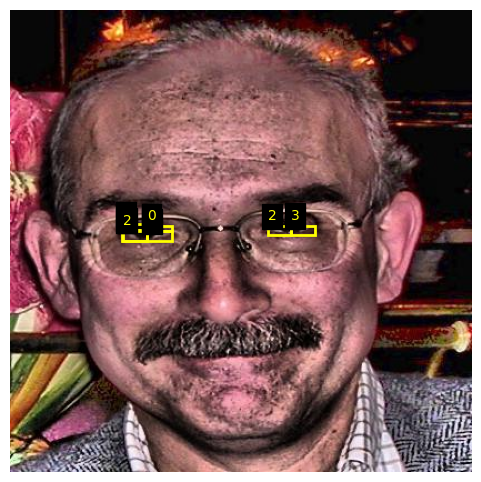


image 1/1 /home/j-i13b101/Eye-Detection-4/test/images/image_0205_jpg.rf.e48897356ed9bb87a396ebcf5b0da1b1.jpg: 416x416 4 1s, 1 2, 1 3, 6.8ms
Speed: 0.8ms preprocess, 6.8ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


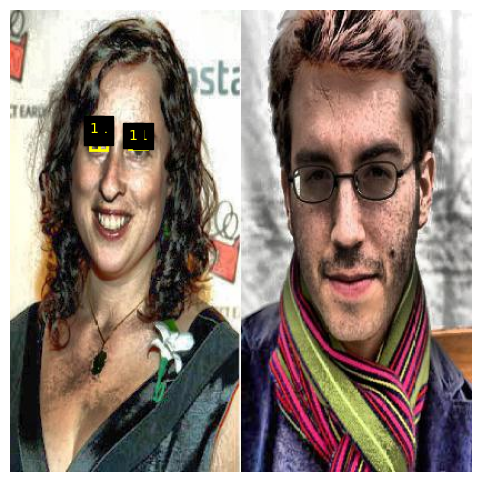


image 1/1 /home/j-i13b101/Eye-Detection-4/test/images/5106695994_5_jpg.rf.c867d5ec4f895d20947a96eb3d8c49ed.jpg: 416x416 (no detections), 7.0ms
Speed: 0.8ms preprocess, 7.0ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)


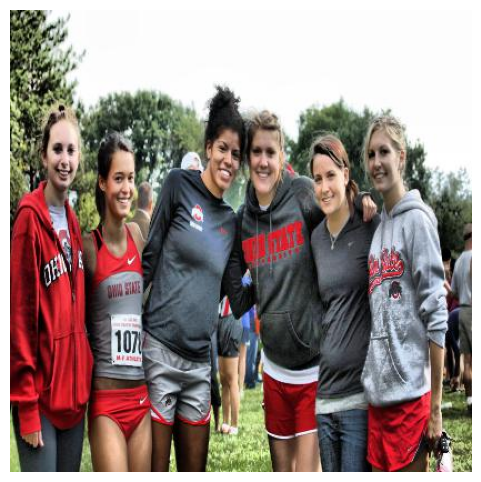


image 1/1 /home/j-i13b101/Eye-Detection-4/test/images/indoor_218_jpg.rf.cd4f94077f3cf4a0fcf3f9246657a1a4.jpg: 416x416 2 3s, 7.0ms
Speed: 0.8ms preprocess, 7.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


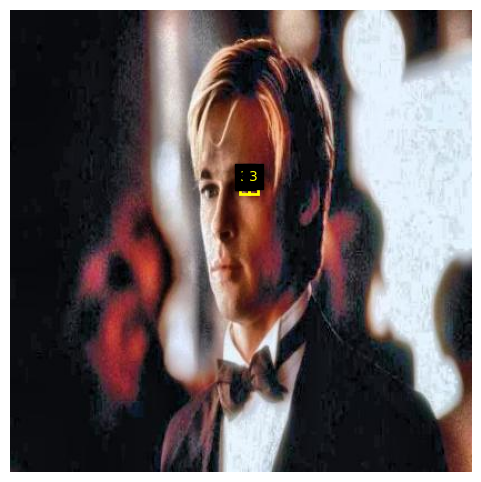


image 1/1 /home/j-i13b101/Eye-Detection-4/test/images/image_0092_jpg.rf.9b4a91e43cb726e0fa1ff88fbc436b9d.jpg: 416x416 1 0, 2 2s, 3 3s, 7.2ms
Speed: 0.8ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


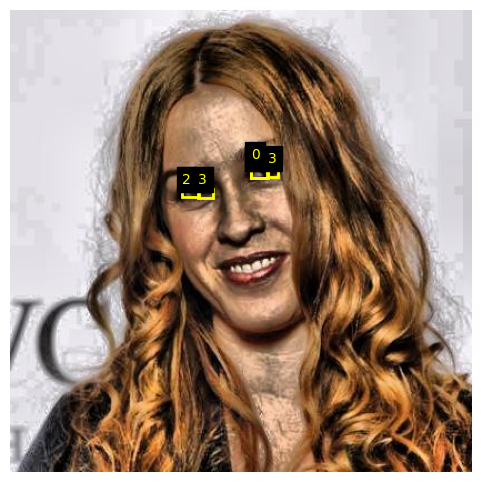

In [14]:
# 1) 훈련된 모델 로드
model = YOLO('runs/train/eye_kso3d_v4/weights/best.pt')

# 2) 테스트 이미지 목록 가져오기
test_dir = dataset_root / 'test' / 'images'
test_images = list(test_dir.glob('*.*'))

# 3) 시각화를 위한 랜덤 샘플 선택 (최대 5장)
sample_images = random.sample(test_images, min(5, len(test_images)))

# 4) 이미지별로 예측 & 시각화
for img_path in sample_images:
    img = Image.open(img_path)
    results = model(str(img_path))  # inference
    boxes = results[0].boxes        # 박스 정보

    # 시각화
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img)

    for box in boxes:
        # 좌표 및 클래스 추출
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        cls = int(box.cls[0].cpu().numpy())
        label = results[0].names[cls]
        
        # 사각형 추가
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='yellow', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, label,
                fontsize=10, backgroundcolor='black', color='yellow')
    
    ax.axis('off')
    plt.show()

# 학습 로그 시각화

In [12]:
import pandas as pd
metrics = pd.read_csv('runs/train/eye_kso3d_v4/results.csv')
metrics.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,7.63396,4.29197,6.48848,1.42491,0.00044,0.01477,0.00094,0.00022,3.51266,4.12209,1.08903,0.000411,0.000411,0.000411
1,2,14.13240,3.50889,3.16110,1.05058,0.16753,0.05983,0.07386,0.01920,3.17247,2.66758,1.04164,0.000819,0.000819,0.000819
2,3,20.68540,3.31050,2.69188,1.02320,0.15844,0.26061,0.11038,0.03054,3.03593,1.94932,1.01224,0.001219,0.001219,0.001219
3,4,26.58490,3.12263,2.41773,0.98871,0.25980,0.29979,0.16909,0.05173,2.81686,1.70969,0.97645,0.001213,0.001213,0.001213
4,5,34.00150,3.05326,2.21685,0.97921,0.25776,0.32894,0.19888,0.06313,2.84759,1.76397,0.97961,0.001200,0.001200,0.001200


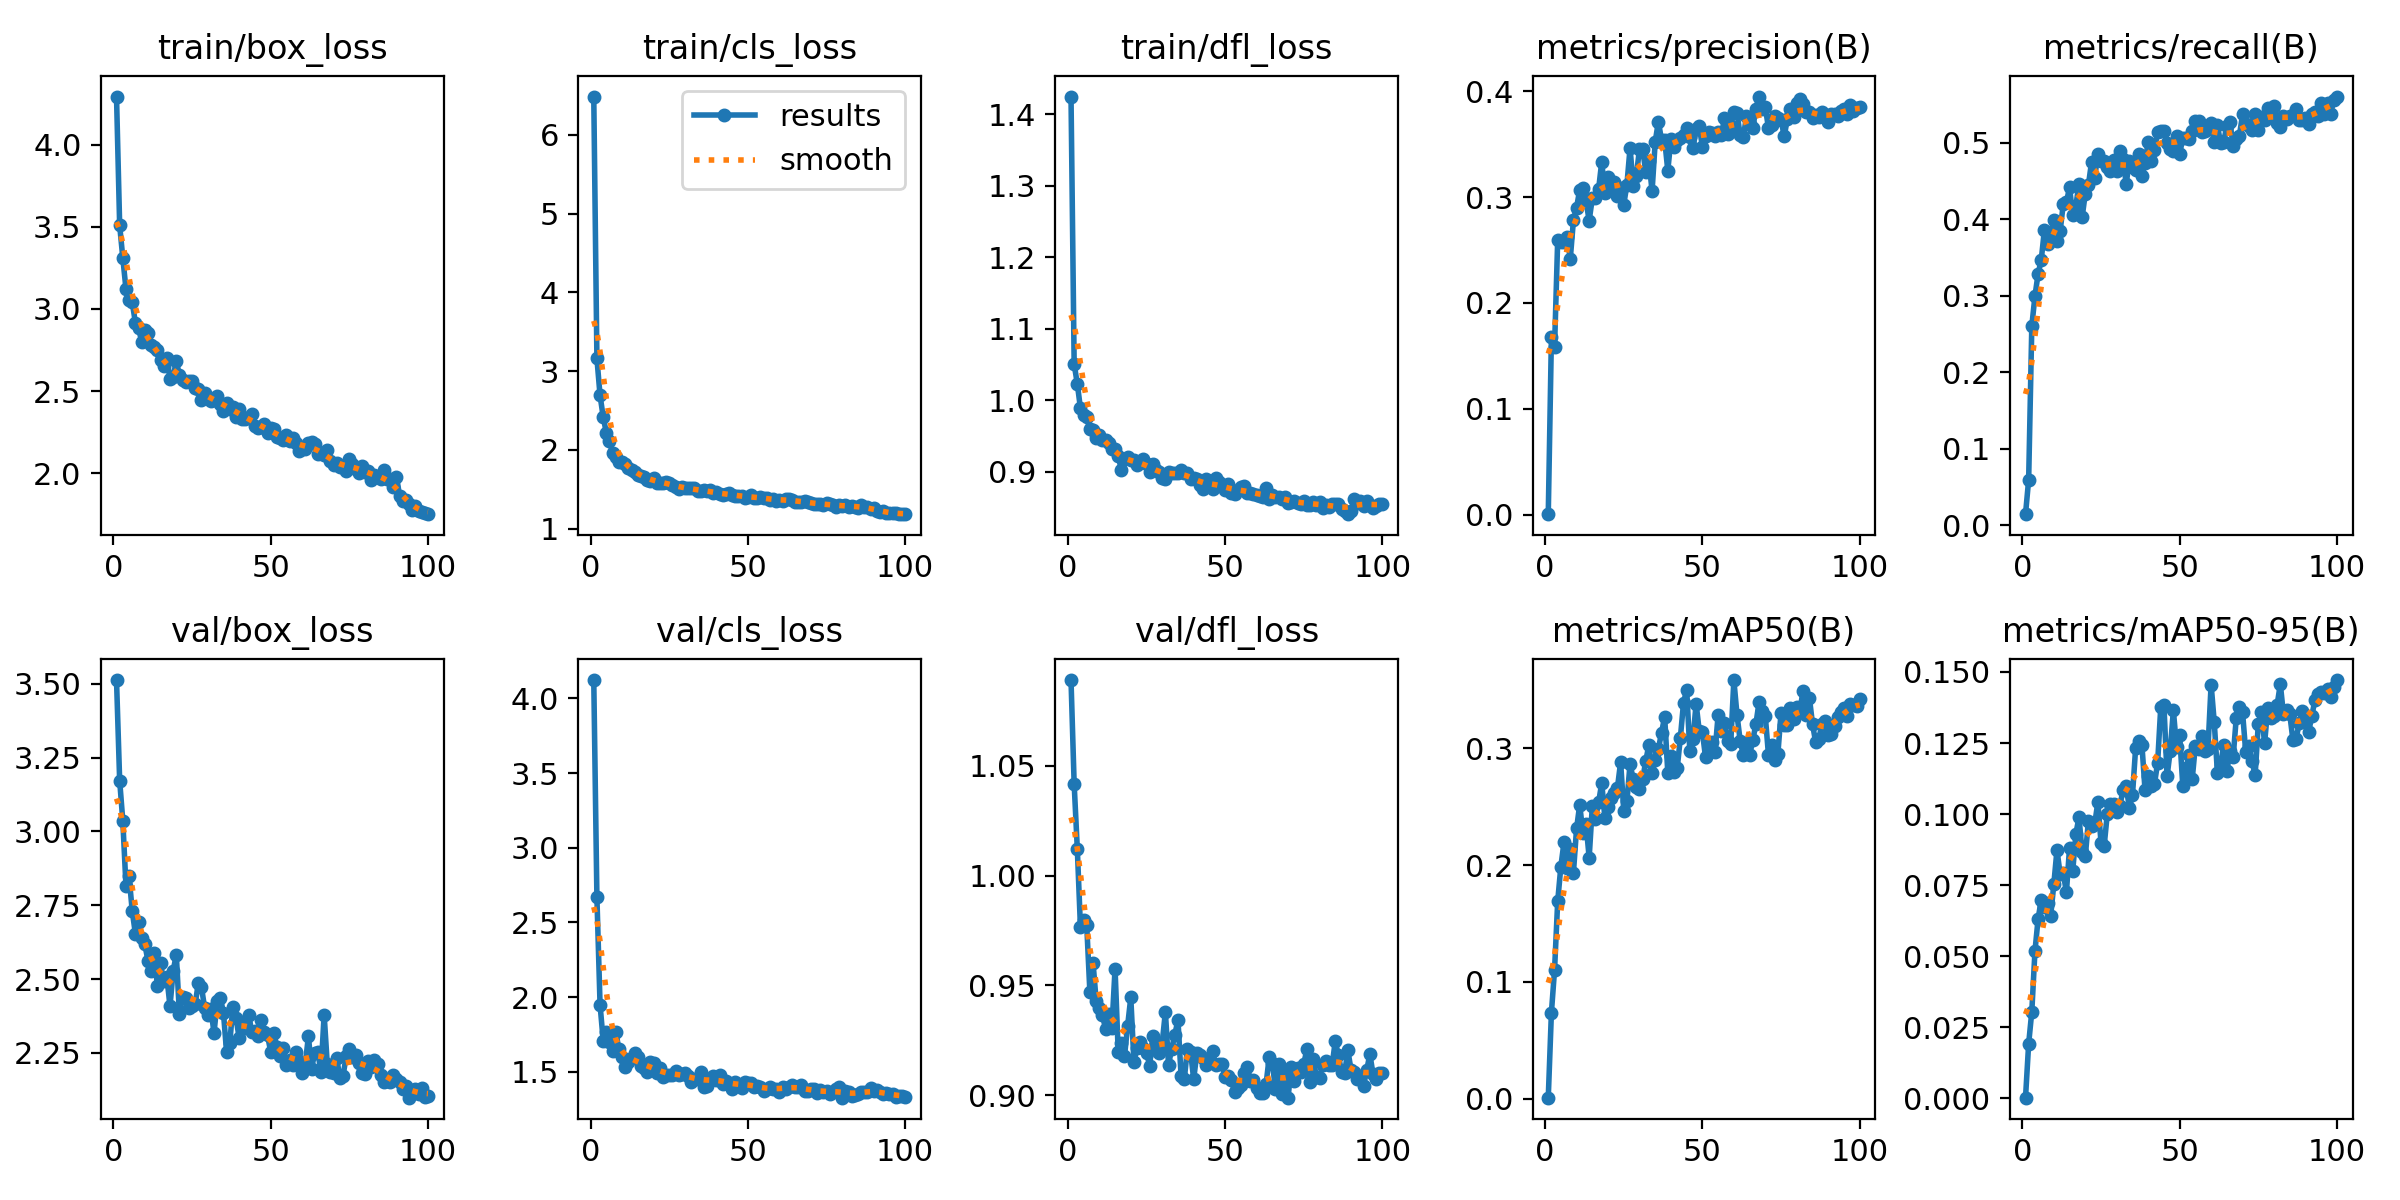

In [18]:
img_path = 'runs/train/eye_kso3d_v4/results.png' 
img = Image.open(img_path)
img.show()